# Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
df=sb.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.shape

(891, 15)

In [ ]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.describe(include='O')

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


In [ ]:
df.describe(exclude=['O','int','float'])

,class,adult_male,deck,alone
count,891,891,203,891
unique,3,2,7,2
top,Third,True,C,True
freq,491,537,59,537


In [ ]:
df.nunique()

,0
survived,2
pclass,3
sex,2
age,88
sibsp,7
parch,7
fare,248
embarked,3
class,3
who,3


In [ ]:
df.isnull().mean()*100

,0
survived,0.000000
pclass,0.000000
sex,0.000000
age,19.865320
sibsp,0.000000
parch,0.000000
fare,0.000000
embarked,0.224467
class,0.000000
who,0.000000


# EDA

## adjust column names

In [ ]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [ ]:
df.rename(columns={'sibsp':'sib-sp','parch':'par-ch'},inplace=True)
df

,survived,pclass,sex,age,sib-sp,par-ch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
df['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

## adjust columns datatype

nunum

In [ ]:
# df['survived']=df['survived'].astype('O')

## Remove redundant columns

<Axes: >

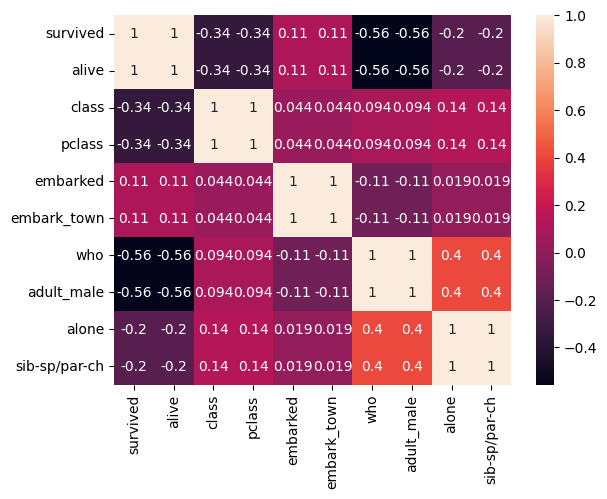

In [ ]:
df2=pd.DataFrame()
df2['survived']=df['survived']
df2['alive']=df['alive'].map({'no':0,'yes':1})
df2['class']=df['class'].map({'First':1,'Second':2,'Third':3})
df2['pclass']=df['pclass']
df2['embarked']=df['embarked'].map({'S':1,'C':2,'Q':3})
df2['embark_town']=df['embark_town'].map({'Southampton':1,'Cherbourg':2,'Queenstown':3})
df2['who']=df['who'].map({'man':1,'woman':0,'child':0})
df2['adult_male']=df['adult_male'].map({True:1,False:0})
df2['alone']=df['alone'].map({True:1,False:0})
df2['sib-sp/par-ch']=((df['sib-sp']==0)&(df['par-ch']==0)).map({True:1,False:0})

sb.heatmap(df2.corr(),annot=True)



In [ ]:
df.drop(columns=['alive','pclass','embarked','adult_male','alone'],inplace=True)
df

,survived,sex,age,sib-sp,par-ch,fare,class,who,deck,embark_town
0,0,male,22.0,1,0,7.2500,Third,man,NaN,Southampton
1,1,female,38.0,1,0,71.2833,First,woman,C,Cherbourg
2,1,female,26.0,0,0,7.9250,Third,woman,NaN,Southampton
3,1,female,35.0,1,0,53.1000,First,woman,C,Southampton
4,0,male,35.0,0,0,8.0500,Third,man,NaN,Southampton
...,...,...,...,...,...,...,...,...,...,...
886,0,male,27.0,0,0,13.0000,Second,man,NaN,Southampton
887,1,female,19.0,0,0,30.0000,First,woman,B,Southampton
888,0,female,NaN,1,2,23.4500,Third,woman,NaN,Southampton
889,1,male,26.0,0,0,30.0000,First,man,C,Cherbourg


## Remove duplicates

In [ ]:
df[df.duplicated(keep='first')]

,survived,sex,age,sib-sp,par-ch,fare,class,who,deck,embark_town
47,1,female,NaN,0,0,7.7500,Third,woman,NaN,Queenstown
76,0,male,NaN,0,0,7.8958,Third,man,NaN,Southampton
77,0,male,NaN,0,0,8.0500,Third,man,NaN,Southampton
87,0,male,NaN,0,0,8.0500,Third,man,NaN,Southampton
95,0,male,NaN,0,0,8.0500,Third,man,NaN,Southampton
...,...,...,...,...,...,...,...,...,...,...
870,0,male,26.0,0,0,7.8958,Third,man,NaN,Southampton
877,0,male,19.0,0,0,7.8958,Third,man,NaN,Southampton
878,0,male,NaN,0,0,7.8958,Third,man,NaN,Southampton
884,0,male,25.0,0,0,7.0500,Third,man,NaN,Southampton


In [ ]:
# df.drop_duplicates(inplace=True,keep='first')

# EDA2


In [ ]:
df.head()

,survived,sex,age,sib-sp,par-ch,fare,class,who,deck,embark_town
0,0,male,22.0,1,0,7.2500,Third,man,NaN,Southampton
1,1,female,38.0,1,0,71.2833,First,woman,C,Cherbourg
2,1,female,26.0,0,0,7.9250,Third,woman,NaN,Southampton
3,1,female,35.0,1,0,53.1000,First,woman,C,Southampton
4,0,male,35.0,0,0,8.0500,Third,man,NaN,Southampton


In [ ]:
df.shape

(891, 10)

In [ ]:
df.columns

Index(['survived', 'sex', 'age', 'sib-sp', 'par-ch', 'fare', 'class', 'who',
       'deck', 'embark_town'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   sex          891 non-null    object  
 2   age          714 non-null    float64 
 3   sib-sp       891 non-null    int64   
 4   par-ch       891 non-null    int64   
 5   fare         891 non-null    float64 
 6   class        891 non-null    category
 7   who          891 non-null    object  
 8   deck         203 non-null    category
 9   embark_town  889 non-null    object  
dtypes: category(2), float64(2), int64(3), object(3)
memory usage: 58.0+ KB


In [ ]:
df.describe()

,survived,age,sib-sp,par-ch,fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,0.523008,0.381594,32.204208
std,0.486592,14.526497,1.102743,0.806057,49.693429
min,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.describe(include=['O'])

,sex,who,embark_town
count,891,891,889
unique,2,3,3
top,male,man,Southampton
freq,577,537,644


In [ ]:
df.describe(exclude=['O','int','float'])

,class,deck
count,891,203
unique,3,7
top,Third,C
freq,491,59


In [ ]:
df.nunique()

,0
survived,2
sex,2
age,88
sib-sp,7
par-ch,7
fare,248
class,3
who,3
deck,7
embark_town,3


In [ ]:
df.isnull().mean()*100

,0
survived,0.000000
sex,0.000000
age,19.865320
sib-sp,0.000000
par-ch,0.000000
fare,0.000000
class,0.000000
who,0.000000
deck,77.216611
embark_town,0.224467


# Univariate

## Number of survivors


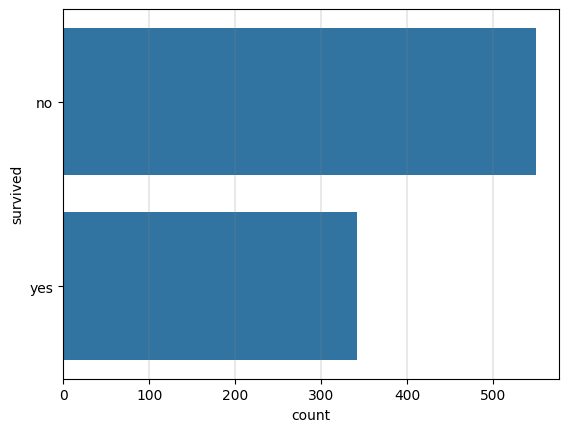

In [ ]:
survived=df['survived'].map({1:'yes',0:'no'})
sb.countplot(survived)
plt.grid(axis='x',color='gray',linewidth=0.25)
plt.show()

#

## Number of males and females who were on the ship

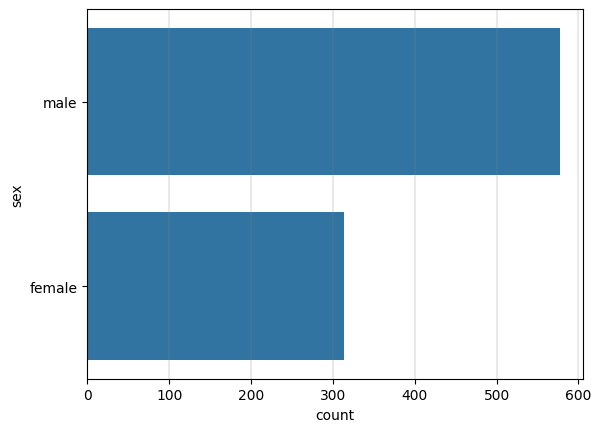

In [ ]:
sb.countplot(df['sex'])
plt.grid(axis='x',color='gray',linewidth=0.25)
plt.show()

## The ages of the people on the ship

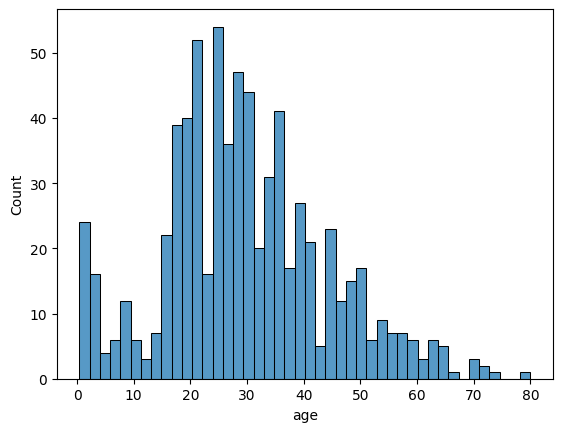

In [ ]:
sb.histplot(df['age'],bins=44)
plt.show()

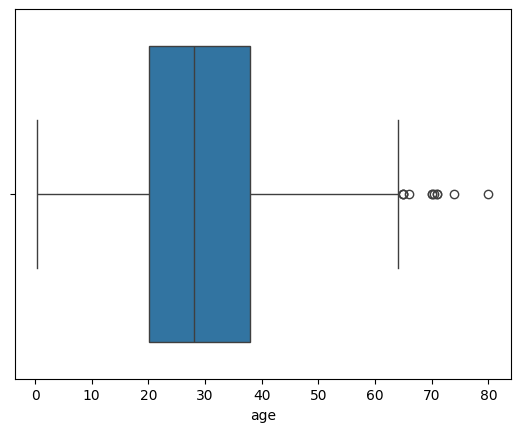

In [ ]:
sb.boxplot(x=df['age'])
plt.show()

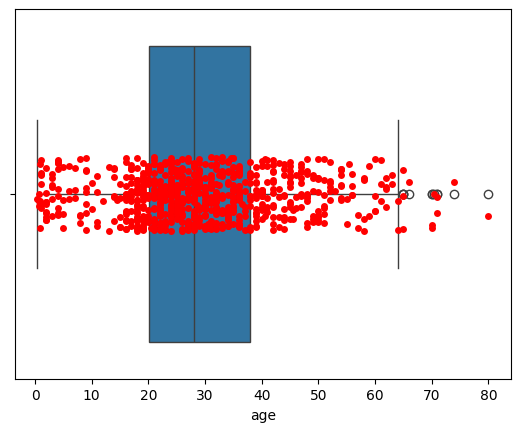

In [ ]:
sb.boxplot(x=df['age'])
sb.stripplot(x=df['age'],color='r')
plt.show()

## The Number of Siblings and Spouse Each Passenger Has

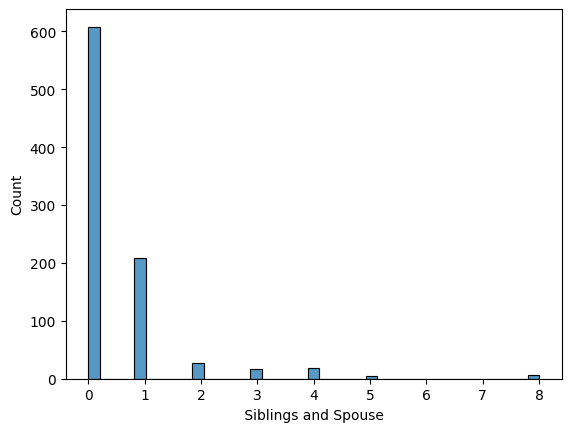

In [ ]:
sb.histplot(df['sib-sp'])
plt.xlabel(' Siblings and Spouse ')
plt.show()

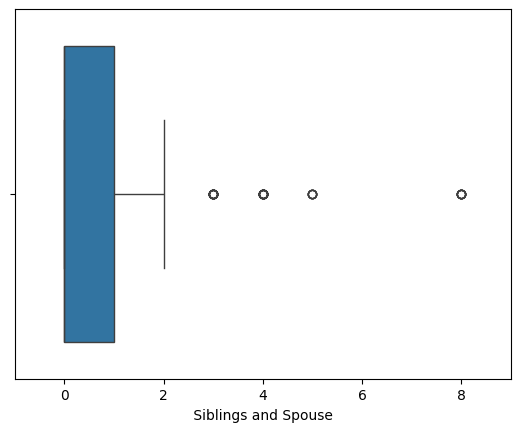

In [ ]:
sb.boxplot(x=df['sib-sp'])
plt.xlabel(' Siblings and Spouse ')
plt.xlim(-1,9)
plt.show()

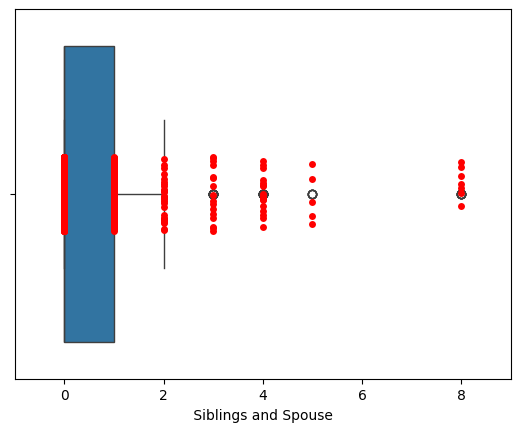

In [ ]:
sb.boxplot(x=df['sib-sp'])
plt.xlabel(' Siblings and Spouse ')
sb.stripplot(x=df['sib-sp'],color='r')
plt.xlim(-1,9)
plt.show()

## The Number of Parents and Children Each Passenger Has

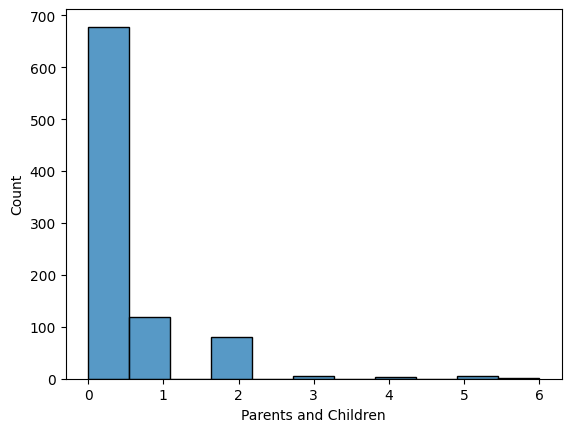

In [ ]:
sb.histplot(df['par-ch'])
plt.xlabel('Parents and Children')
plt.show()

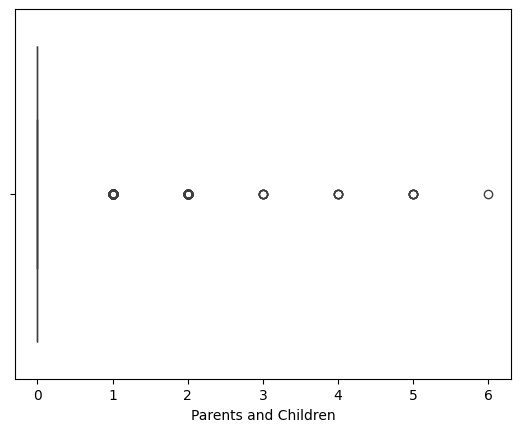

In [ ]:
sb.boxplot(x=df['par-ch'])
plt.xlabel('Parents and Children')
plt.show()

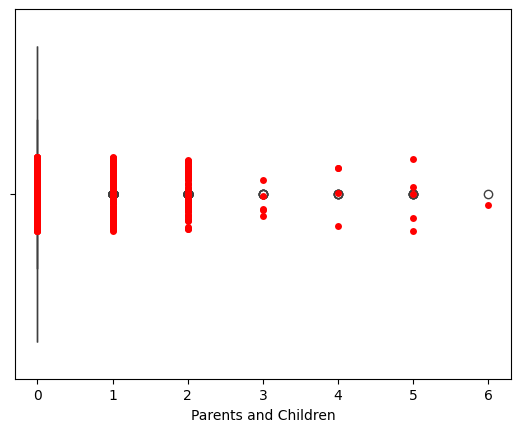

In [ ]:
sb.boxplot(x=df['par-ch'])
plt.xlabel('Parents and Children')
sb.stripplot(x=df['par-ch'],color='r')
plt.show()

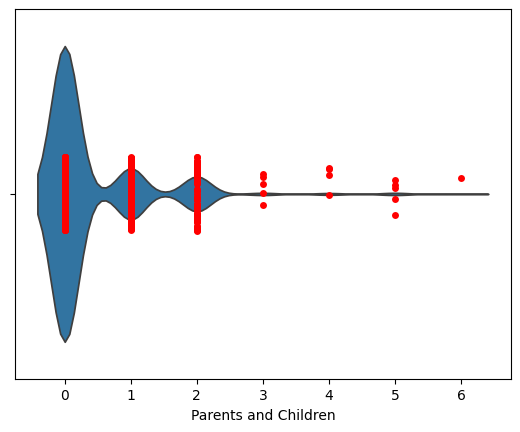

In [ ]:
sb.violinplot(x=df['par-ch'])
plt.xlabel('Parents and Children')
sb.stripplot(x=df['par-ch'],color='r')
plt.show()

## The fare of each passenger

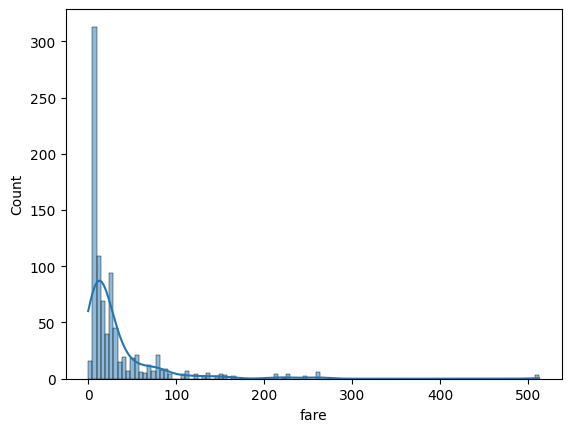

In [ ]:
sb.histplot(df['fare'],kde=True)
plt.show()

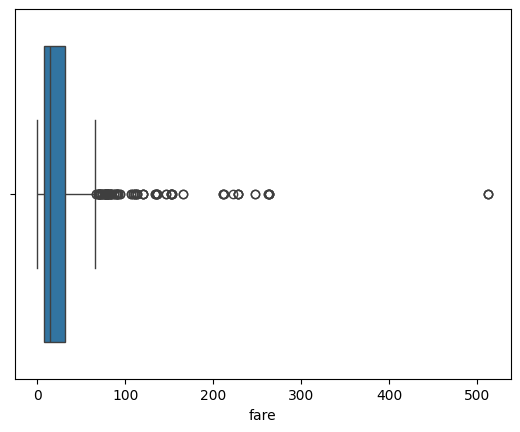

In [ ]:
sb.boxplot(x=df['fare'])
plt.show()

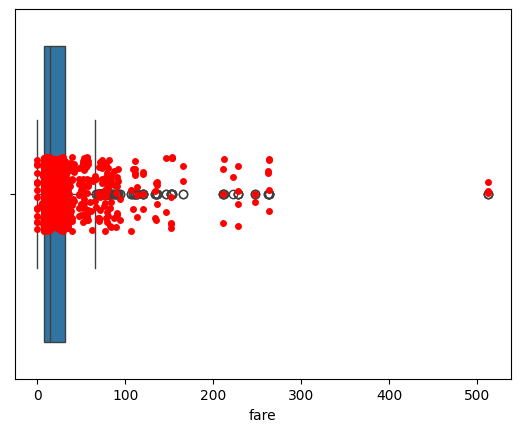

In [ ]:
sb.boxplot(x=df['fare'])
sb.stripplot(x=df['fare'],color='r')
plt.show()

## The class of each passenger


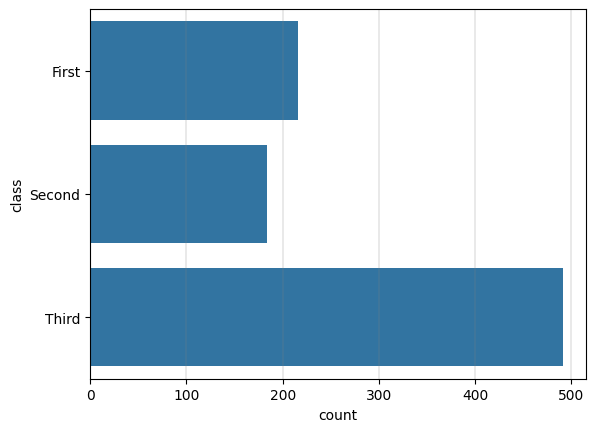

In [ ]:
sb.countplot(df['class'])
plt.grid(axis='x',color='gray',linewidth=0.25)
plt.show()

## who is the passenger

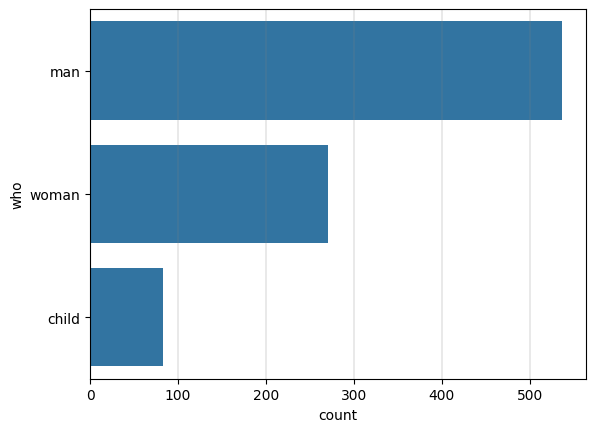

In [ ]:
sb.countplot(df['who'])
plt.grid(axis='x',color='gray',linewidth=0.25)
plt.show()

## Deck of each passenger

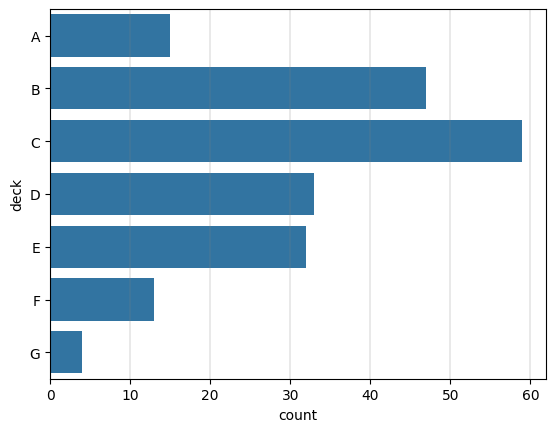

In [ ]:
sb.countplot(df['deck'])
plt.grid(axis='x',color='gray',linewidth=0.25)
plt.show()

## embark_town of each passenger

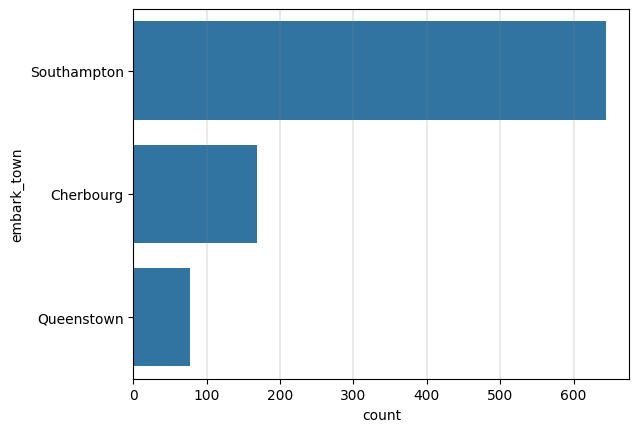

In [ ]:
sb.countplot(df['embark_town'])
plt.grid(axis='x',color='gray',linewidth=0.25)
plt.show()

# Bivariate

## Which gender survives more?

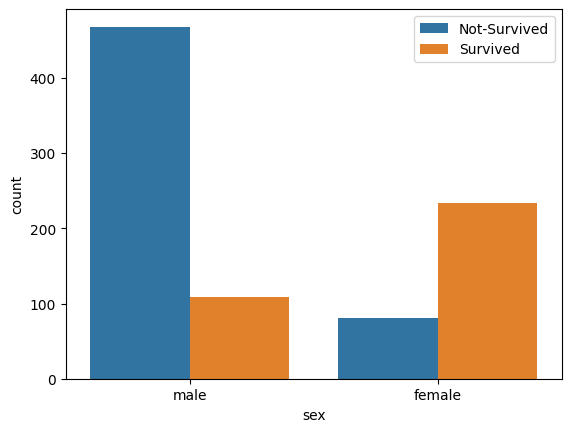

In [ ]:
sb.countplot(x='sex',hue='survived',data=df)
plt.legend(['Not-Survived','Survived'])
plt.show()

## Was age a determining factor in survival?

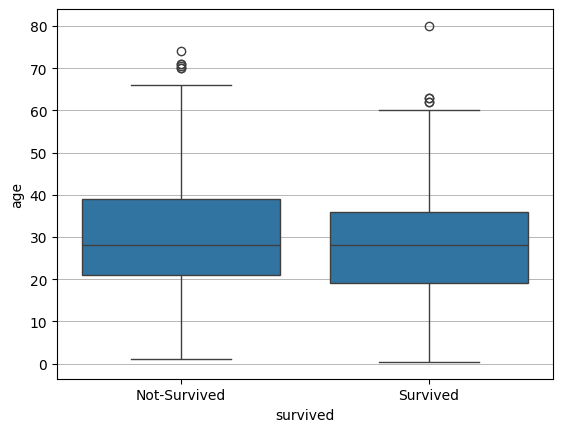

In [ ]:
sb.boxplot(x='survived',y='age',data=df)
plt.grid(axis='y',color='gray',linewidth=0.4)
plt.xticks(ticks=[0,1],labels=['Not-Survived','Survived'])
plt.show()

## Was having siblings and a spouse a determining factor in survival?

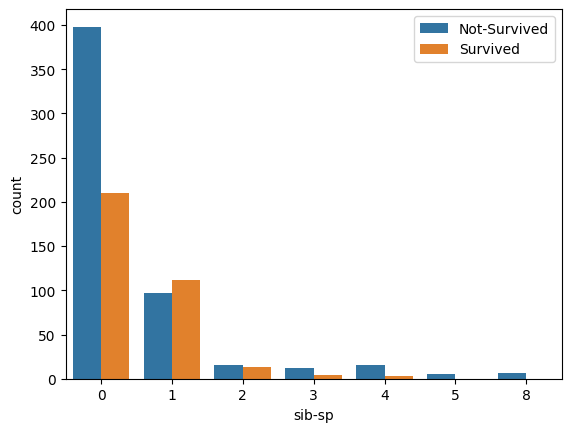

In [ ]:
sb.countplot(x='sib-sp',hue='survived',data=df)
plt.legend(['Not-Survived','Survived'])
plt.show()

## Was having parents and childern a determining factor in survival?

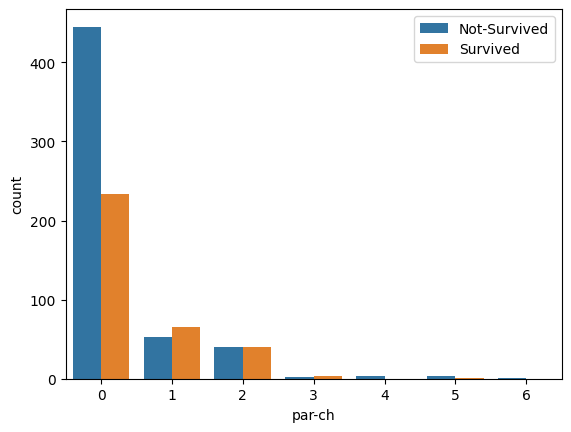

In [ ]:
sb.countplot(x='par-ch',hue='survived',data=df)
plt.legend(['Not-Survived','Survived'])
plt.show()

## Was the fare a determining factor in survival?

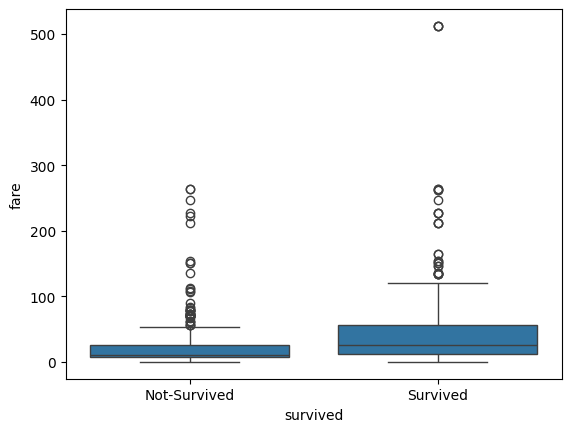

In [ ]:
sb.boxplot(x='survived',y='fare',data=df)
plt.xticks(ticks=[0,1],labels=['Not-Survived','Survived'])
plt.show()

## Was the class a determining factor in survival?


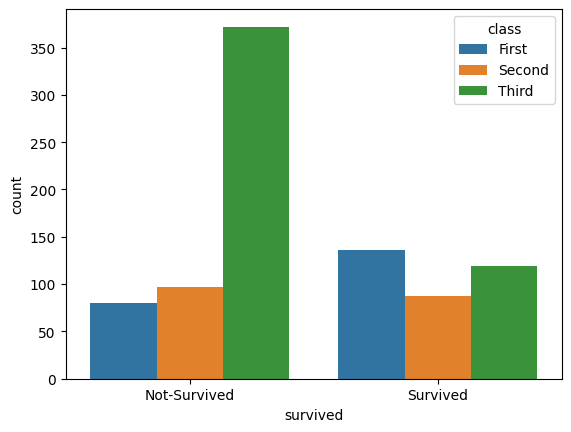

In [ ]:
sb.countplot(x='survived',hue='class',data=df)
plt.xticks(ticks=[0,1],labels=['Not-Survived','Survived'])
plt.show()

## Was type of passenger a determining factor in survival?

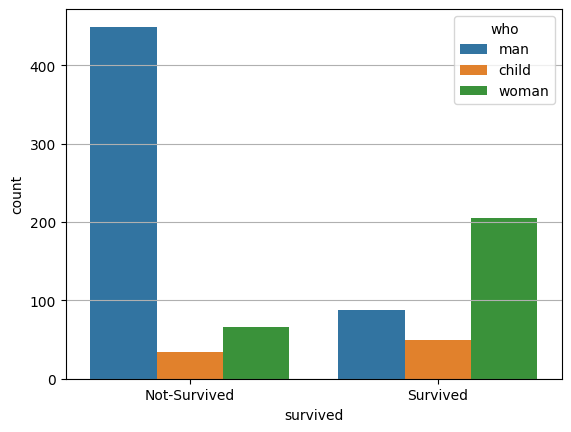

In [ ]:
sb.countplot(x='survived',hue='who',data=df)
plt.xticks(ticks=[0,1],labels=['Not-Survived','Survived'])
plt.grid(axis='y')
plt.show()

## Was the passenger's deck a determining factor in survival?

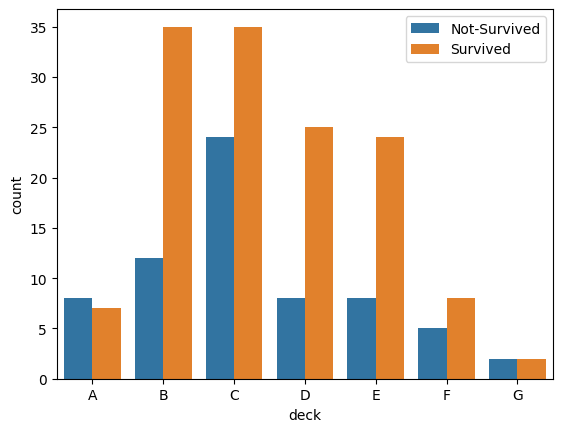

In [ ]:
sb.countplot(x='deck',hue='survived',data=df)
plt.legend(['Not-Survived','Survived'])
plt.show()

## Was the passenger's embark_town a determining factor in survival?


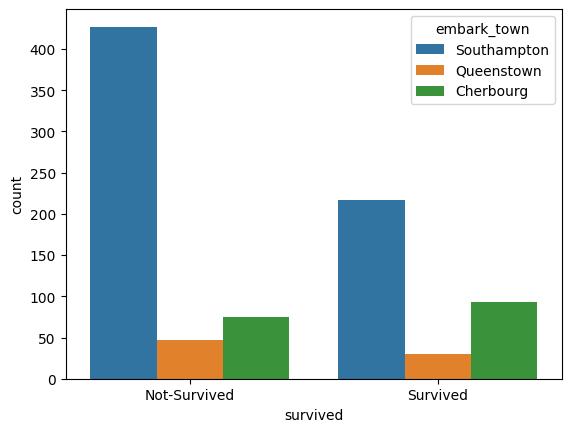

In [ ]:
sb.countplot(x='survived',hue='embark_town',data=df)
plt.xticks(ticks=[0,1],labels=['Not-Survived','Survived'])
plt.show()

## What is the age range for males and females?

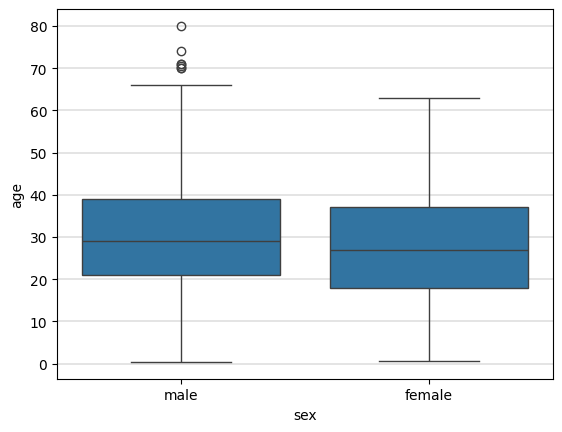

In [ ]:
sb.boxplot(x='sex',y='age',data=df)
plt.grid(axis='y',color='gray',linewidth=0.3)
plt.show()

## Which gender has more siblings or a spouse on the ship?

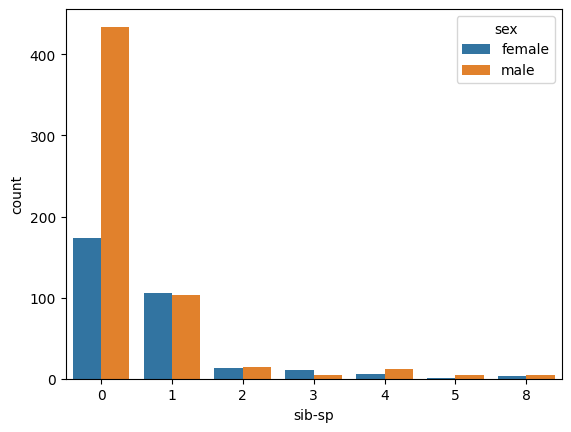

In [ ]:
sb.countplot(x='sib-sp',hue='sex',data=df)
plt.show()

## Which gender has more parents or children on the ship?

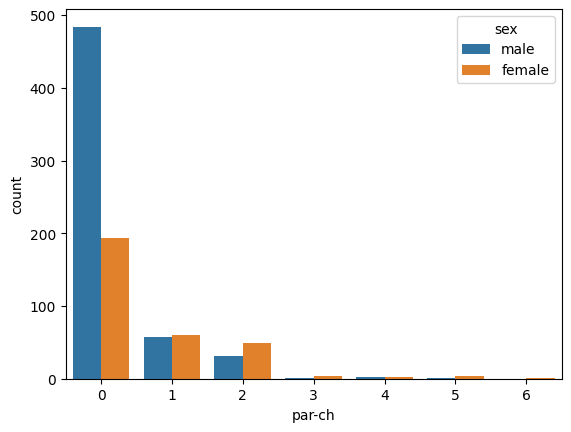

In [ ]:
sb.countplot(x='par-ch',hue='sex',data=df)
plt.show()

## Which gender pays a higher fare?

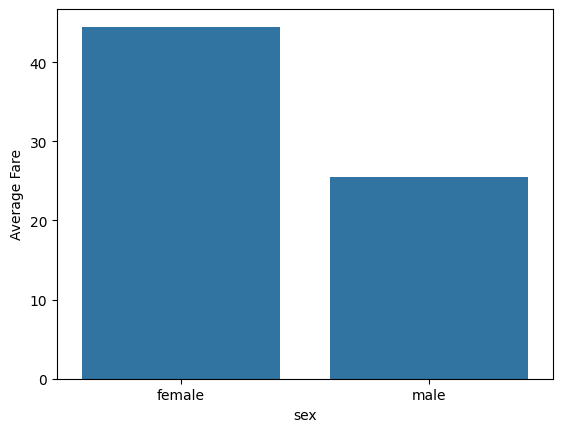

In [ ]:
sb.barplot(df.groupby('sex')['fare'].mean())
plt.ylabel('Average Fare')
plt.show()

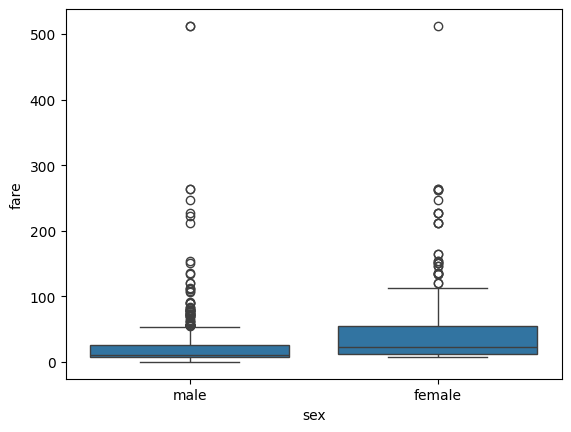

In [ ]:
sb.boxplot(x='sex',y='fare',data=df)
plt.show()

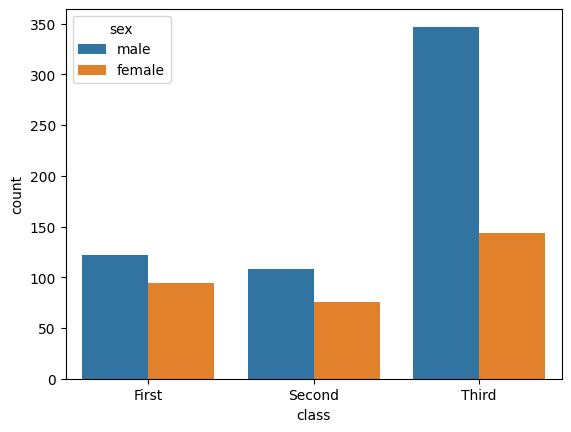

In [ ]:
sb.countplot(x='class',hue='sex',data=df)
plt.show()

## Were there more male children than female children?

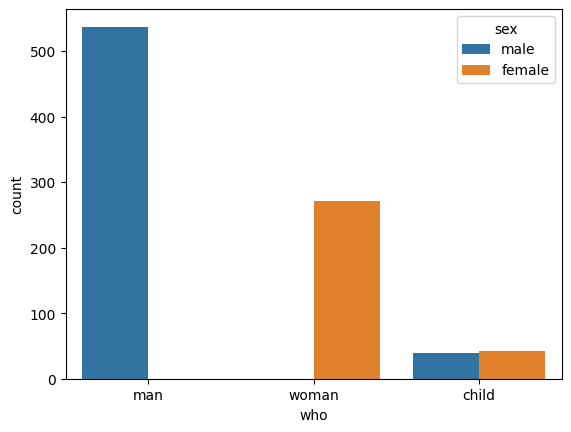

In [ ]:
sb.countplot(x='who',hue='sex',data=df)
plt.show()

## decks for each gender

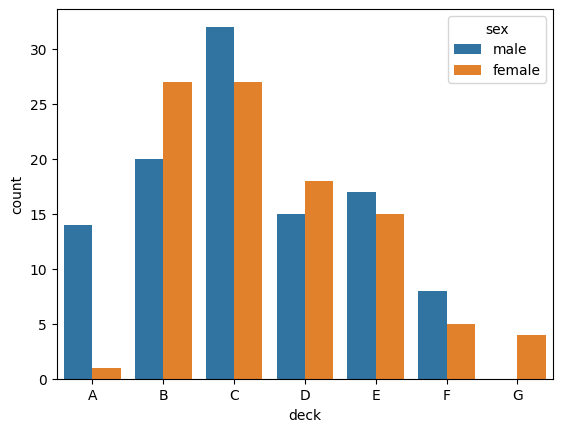

In [ ]:
sb.countplot(x='deck',hue='sex',data=df)
plt.show()

## embark_town for each gender

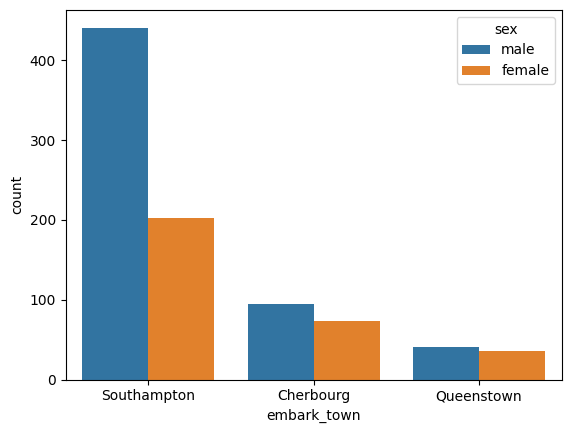

In [ ]:
sb.countplot(x='embark_town',hue='sex',data=df)
plt.show()

## fare range  of each class

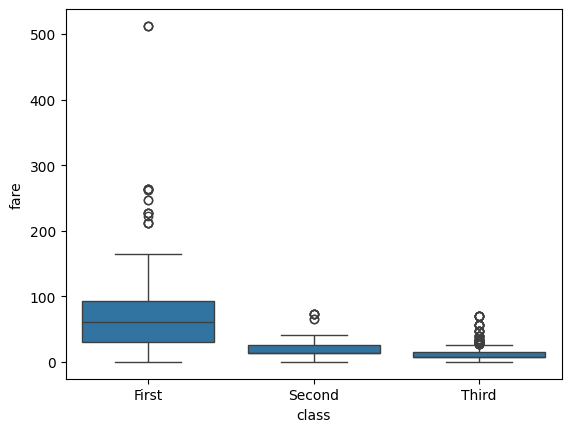

In [ ]:
sb.boxplot(x='class',y='fare',data=df)
plt.show()

## fare range for passenger type

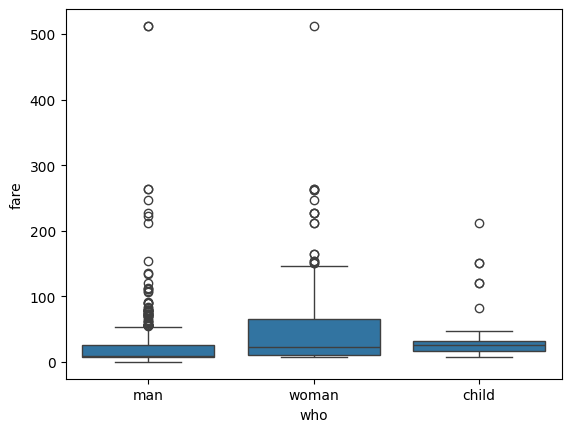

In [ ]:
sb.boxplot(x='who',y='fare',data=df)
plt.show()

## fare range for each deck


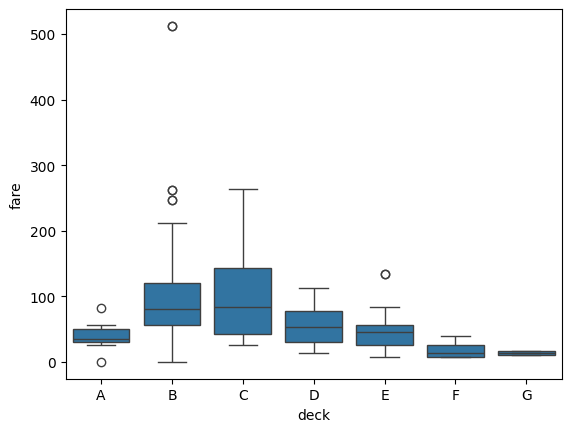

In [ ]:
sb.boxplot(x='deck',y='fare',data=df)
plt.show()

## fare range for each embark_town

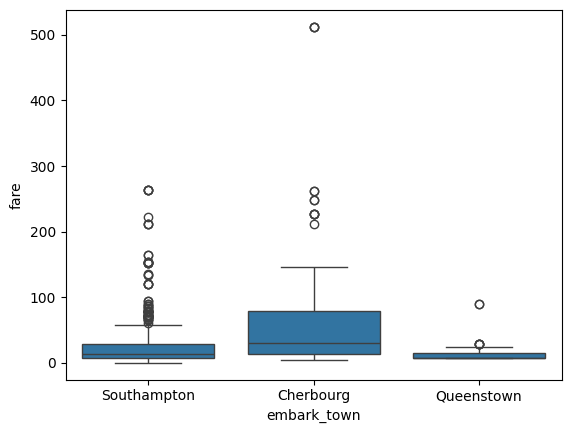

In [ ]:
sb.boxplot(x='embark_town',y='fare',data=df)
plt.show()

## The distribution of passengers by class according to their type

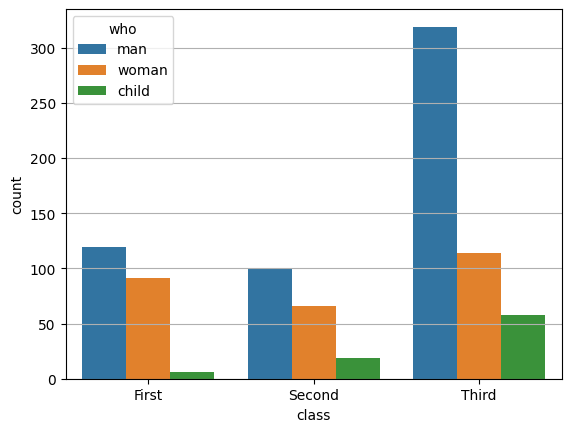

In [ ]:
sb.countplot(x='class',hue='who',data=df)
plt.grid(axis='y')
plt.show()

## The distribution of passengers by class according to their deck

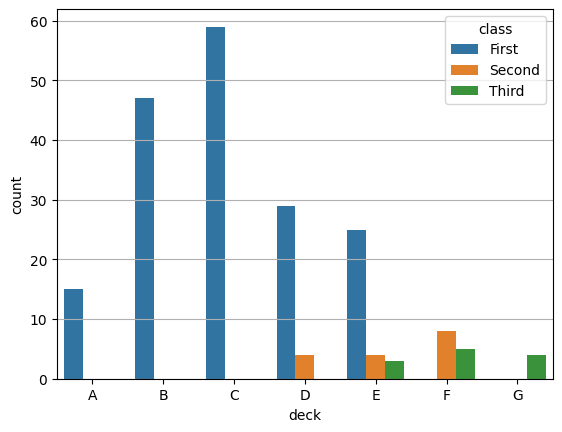

In [ ]:
sb.countplot(x='deck',hue='class',data=df)
plt.grid(axis='y')
plt.show()

## The distribution of passenger classes based on the embark_town

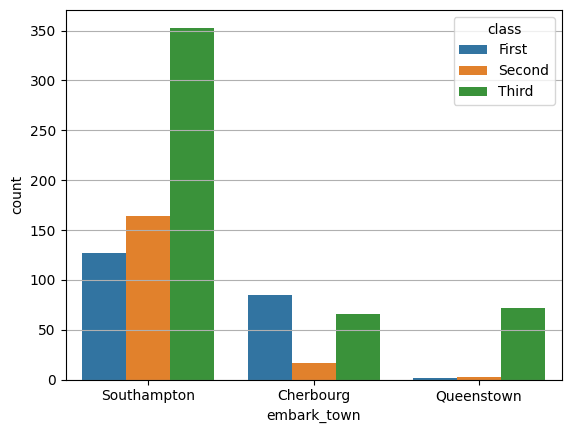

In [ ]:
sb.countplot(x='embark_town',hue='class',data=df)
plt.grid(axis='y')
plt.show()

## The distribution of passenger types based on their deck


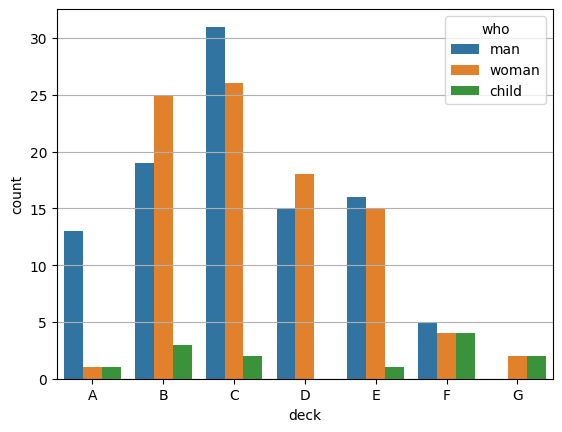

In [ ]:
sb.countplot(x='deck',hue='who',data=df)
plt.grid(axis='y')
plt.show()

## The distribution of passenger types based on the embark_town


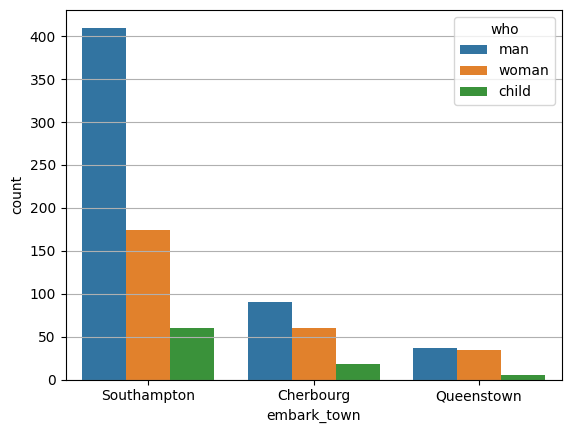

In [ ]:
sb.countplot(x='embark_town',hue='who',data=df)
plt.grid(axis='y')
plt.show()

# Multivariate

## what is The relationship between the average ages of genders and survival

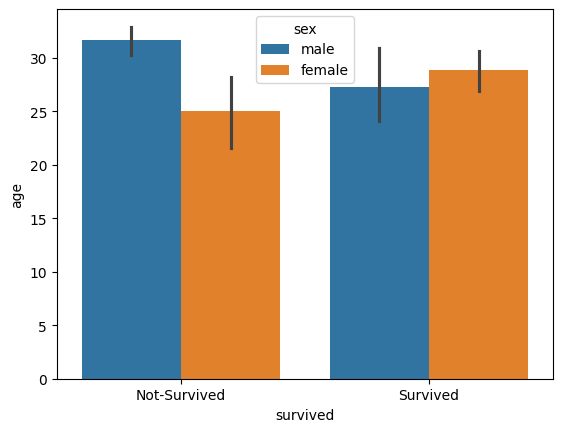

In [ ]:
sb.barplot(x='survived',y='age',hue='sex',data=df)
plt.xticks(ticks=[0,1],labels=['Not-Survived','Survived'])
plt.show()

##  what is The relationship between the sib-sp of each genders and survival?

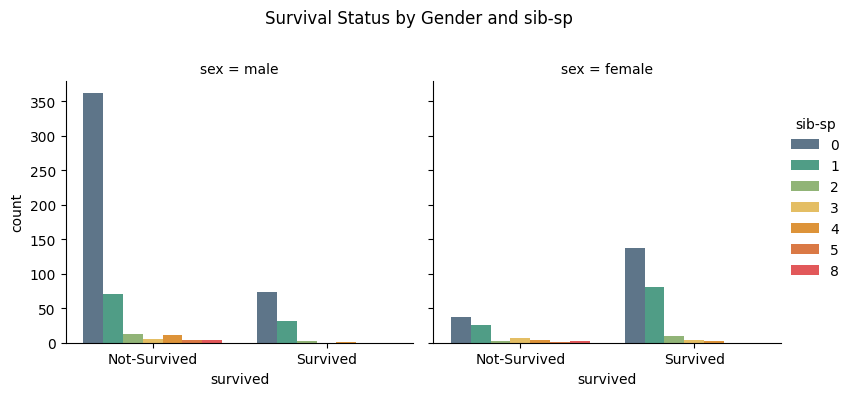

In [ ]:
g = sb.catplot(x="survived", hue="sib-sp", col="sex", data=df, kind="count", palette=["#577590", "#43aa8b",'#90be6d','#f9c74f','#f8961e','#f3722c','#f94144'],height=4, aspect=1)
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Survival Status by Gender and sib-sp')
plt.xticks(ticks=[0,1],labels=['Not-Survived','Survived'])
plt.show()

##  what is The relationship between the par-ch of each genders and survival?

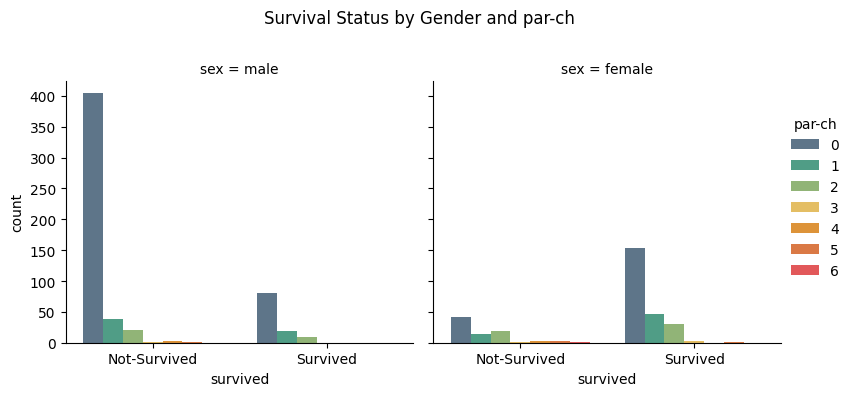

In [ ]:
g = sb.catplot(x="survived", hue="par-ch", col="sex", data=df, kind="count", palette=["#577590", "#43aa8b",'#90be6d','#f9c74f','#f8961e','#f3722c','#f94144'],height=4, aspect=1)
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Survival Status by Gender and par-ch')
plt.xticks(ticks=[0,1],labels=['Not-Survived','Survived'])
plt.show()

##  what is The relationship between the fare of each genders and survival?

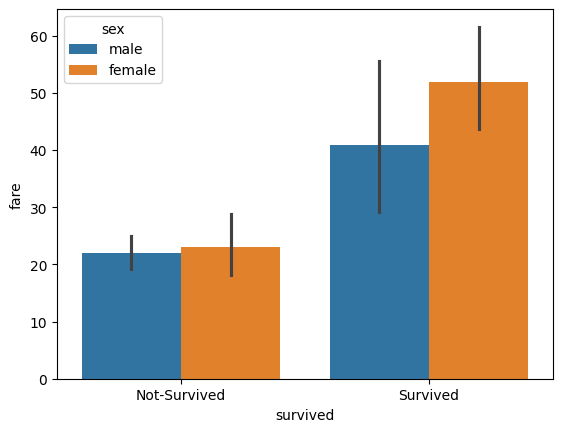

In [ ]:
sb.barplot(x='survived',y='fare',hue='sex',data=df)
plt.xticks(ticks=[0,1],labels=['Not-Survived','Survived'])
plt.show()

##  what is The relationship between the class of each genders and survival?

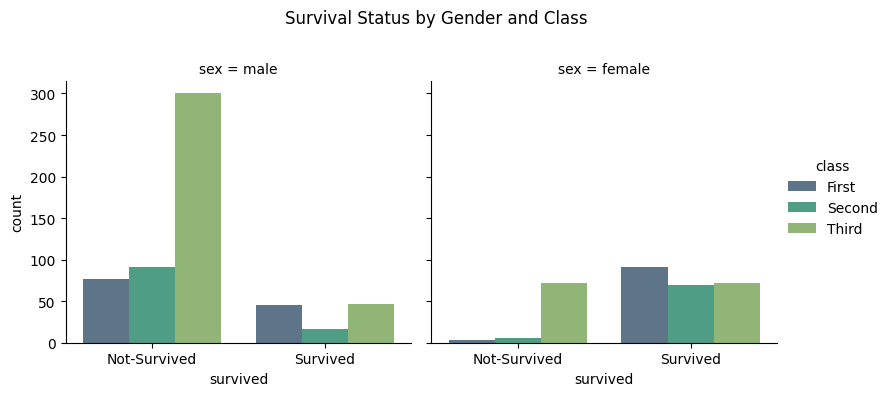

In [ ]:
g = sb.catplot(x="survived", hue="class", col="sex", data=df, kind="count", palette=["#577590", "#43aa8b",'#90be6d'],height=4, aspect=1)
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Survival Status by Gender and Class')
plt.xticks(ticks=[0,1],labels=['Not-Survived','Survived'])
plt.show()

##  what is The relationship between the type of each genders and survival?

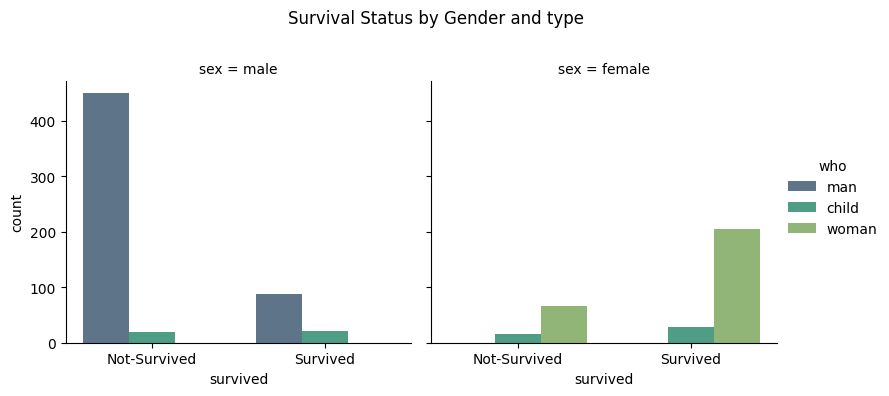

In [ ]:
g = sb.catplot(x="survived", hue="who", col="sex", data=df, kind="count", palette=["#577590", "#43aa8b",'#90be6d'],height=4, aspect=1)
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Survival Status by Gender and type')
plt.xticks(ticks=[0,1],labels=['Not-Survived','Survived'])
plt.show()

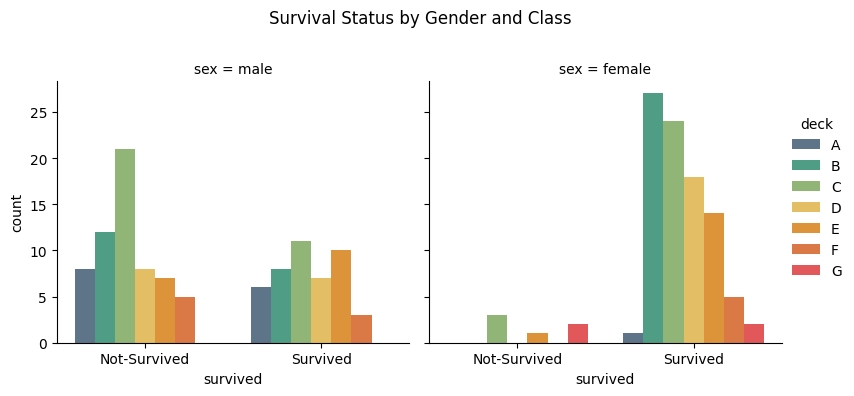

In [ ]:
g = sb.catplot(x="survived", hue="deck", col="sex", data=df, kind="count",  palette=["#577590", "#43aa8b",'#90be6d','#f9c74f','#f8961e','#f3722c','#f94144'],height=4, aspect=1)
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Survival Status by Gender and Class')
plt.xticks(ticks=[0,1],labels=['Not-Survived','Survived'])
plt.show()

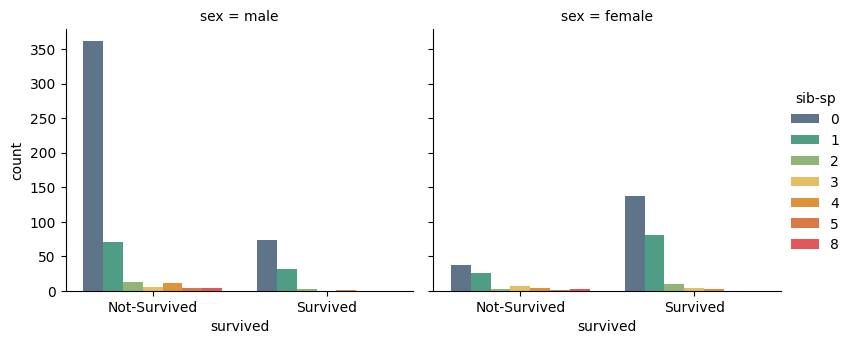

In [ ]:
g = sb.catplot(x="survived", hue="sib-sp", col='sex', data=df, kind="count", palette=["#577590", "#43aa8b",'#90be6d','#f9c74f','#f8961e','#f3722c','#f94144'],height=4, aspect=1)
plt.xticks(ticks=[0,1],labels=['Not-Survived','Survived'])
g.fig.subplots_adjust(top=0.8)
plt.show()

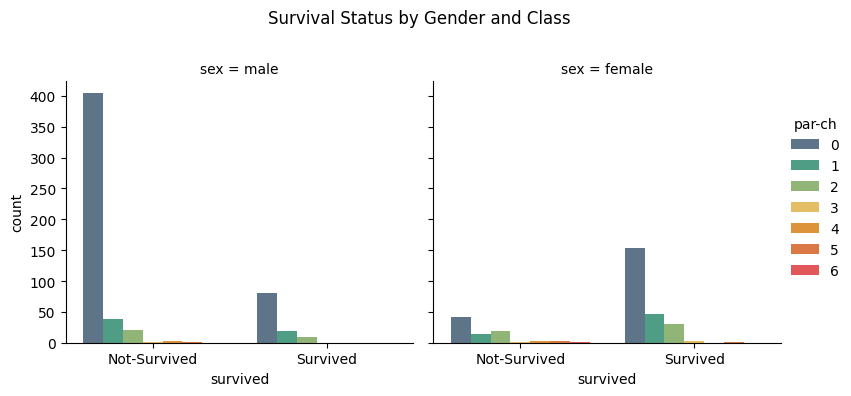

In [ ]:
g = sb.catplot(x="survived", hue="par-ch", col='sex', data=df, kind="count", palette=["#577590", "#43aa8b",'#90be6d','#f9c74f','#f8961e','#f3722c','#f94144'],height=4, aspect=1)
plt.xticks(ticks=[0,1],labels=['Not-Survived','Survived'])
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Survival Status by Gender and Class')
plt.show()

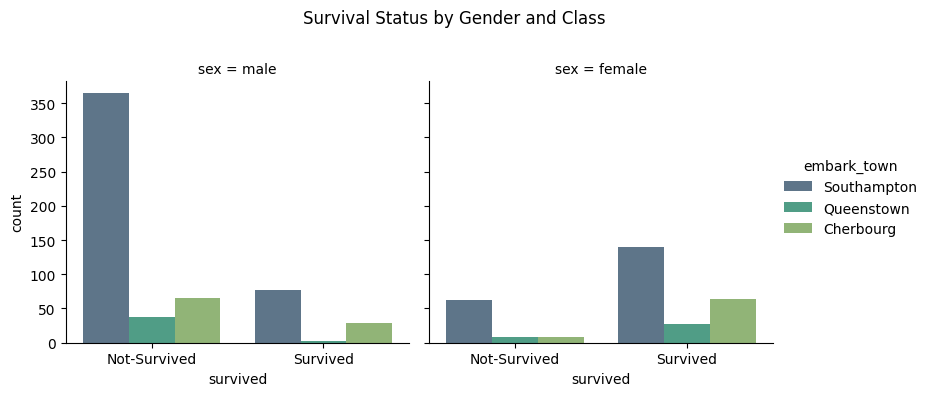

In [ ]:
g = sb.catplot(x="survived", hue="embark_town", col="sex", data=df, kind="count",  palette=["#577590", "#43aa8b",'#90be6d'],height=4, aspect=1)
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Survival Status by Gender and Class')
plt.xticks(ticks=[0,1],labels=['Not-Survived','Survived'])
plt.show()

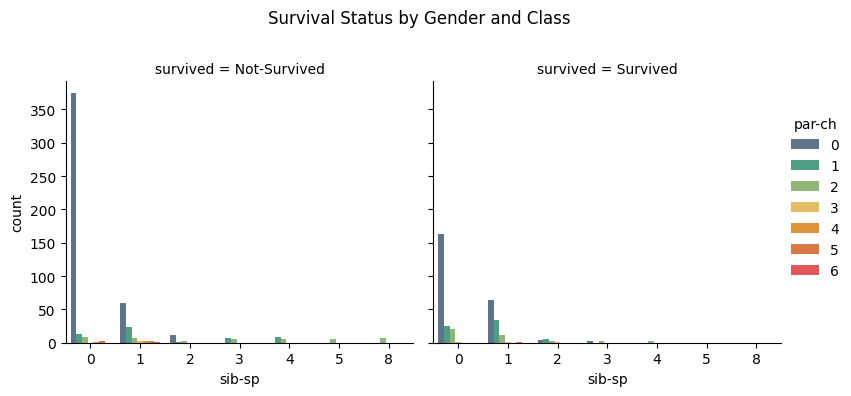

In [ ]:
g = sb.catplot(x="sib-sp", hue="par-ch", col=df['survived'].map({0:'Not-Survived',1:'Survived'}), data=df, kind="count", palette=["#577590", "#43aa8b",'#90be6d','#f9c74f','#f8961e','#f3722c','#f94144'],height=4, aspect=1)
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Survival Status by Gender and Class')
plt.show()

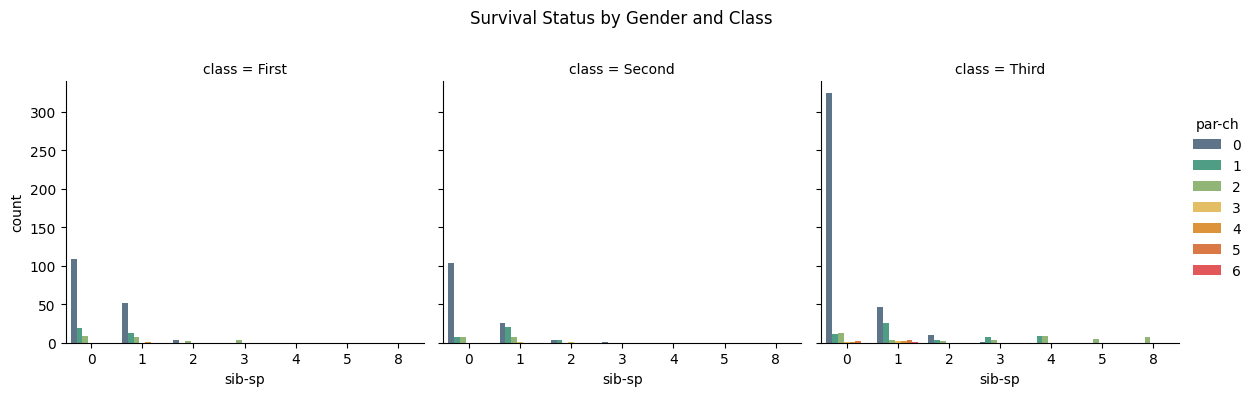

In [ ]:
g = sb.catplot(x="sib-sp", hue="par-ch", col='class', data=df, kind="count", palette=["#577590", "#43aa8b",'#90be6d','#f9c74f','#f8961e','#f3722c','#f94144'],height=4, aspect=1)
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Survival Status by Gender and Class')
plt.show()

In [ ]:
df.columns

Index(['survived', 'sex', 'age', 'sib-sp', 'par-ch', 'fare', 'class', 'who',
       'deck', 'embark_town'],
      dtype='object')

# Models

In [ ]:
data=df.drop(columns=['deck'])
data

,survived,sex,age,sib-sp,par-ch,fare,class,who,embark_town
0,0,male,22.0,1,0,7.2500,Third,man,Southampton
1,1,female,38.0,1,0,71.2833,First,woman,Cherbourg
2,1,female,26.0,0,0,7.9250,Third,woman,Southampton
3,1,female,35.0,1,0,53.1000,First,woman,Southampton
4,0,male,35.0,0,0,8.0500,Third,man,Southampton
...,...,...,...,...,...,...,...,...,...
886,0,male,27.0,0,0,13.0000,Second,man,Southampton
887,1,female,19.0,0,0,30.0000,First,woman,Southampton
888,0,female,NaN,1,2,23.4500,Third,woman,Southampton
889,1,male,26.0,0,0,30.0000,First,man,Cherbourg


In [ ]:
data.dropna(inplace=True)
data

,survived,sex,age,sib-sp,par-ch,fare,class,who,embark_town
0,0,male,22.0,1,0,7.2500,Third,man,Southampton
1,1,female,38.0,1,0,71.2833,First,woman,Cherbourg
2,1,female,26.0,0,0,7.9250,Third,woman,Southampton
3,1,female,35.0,1,0,53.1000,First,woman,Southampton
4,0,male,35.0,0,0,8.0500,Third,man,Southampton
...,...,...,...,...,...,...,...,...,...
885,0,female,39.0,0,5,29.1250,Third,woman,Queenstown
886,0,male,27.0,0,0,13.0000,Second,man,Southampton
887,1,female,19.0,0,0,30.0000,First,woman,Southampton
889,1,male,26.0,0,0,30.0000,First,man,Cherbourg


In [ ]:
num=df.select_dtypes(include=['int','float']).dropna()
num

,survived,age,sib-sp,par-ch,fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500
...,...,...,...,...,...
885,0,39.0,0,5,29.1250
886,0,27.0,0,0,13.0000
887,1,19.0,0,0,30.0000
889,1,26.0,0,0,30.0000


In [ ]:
data

,survived,sex,age,sib-sp,par-ch,fare,class,who,embark_town
0,0,male,22.0,1,0,7.2500,Third,man,Southampton
1,1,female,38.0,1,0,71.2833,First,woman,Cherbourg
2,1,female,26.0,0,0,7.9250,Third,woman,Southampton
3,1,female,35.0,1,0,53.1000,First,woman,Southampton
4,0,male,35.0,0,0,8.0500,Third,man,Southampton
...,...,...,...,...,...,...,...,...,...
885,0,female,39.0,0,5,29.1250,Third,woman,Queenstown
886,0,male,27.0,0,0,13.0000,Second,man,Southampton
887,1,female,19.0,0,0,30.0000,First,woman,Southampton
889,1,male,26.0,0,0,30.0000,First,man,Cherbourg


## GradientBoostingClassifier (numerical-data)

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
x=num.drop(columns=['survived'])
y=num['survived']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42,shuffle=True,stratify=y)

model=GradientBoostingClassifier()
grid_params={'n_estimators':range(5,50,5),'learning_rate':np.linspace(0.1,1,6),'max_depth':range(2,5)}
grids=GridSearchCV(model,grid_params,cv=5,return_train_score=True)
grids.fit(xtrain,ytrain)
best=grids.best_params_

In [ ]:
model=GradientBoostingClassifier(n_estimators=best['n_estimators'],learning_rate=best['learning_rate'],max_depth=best['max_depth'])
model.fit(xtrain,ytrain)

GradientBoostingClassifier(learning_rate=0.28, max_depth=2, n_estimators=25)

In [ ]:
from sklearn.metrics import classification_report
ypredtrain=model.predict(xtrain)
print(classification_report(ytrain,ypredtrain))


              precision    recall  f1-score   support

           0       0.79      0.88      0.83       296
           1       0.79      0.66      0.72       203

    accuracy                           0.79       499
   macro avg       0.79      0.77      0.78       499
weighted avg       0.79      0.79      0.79       499



In [ ]:
ypredtest=model.predict(xtest)
print(classification_report(ytest,ypredtest))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75       128
           1       0.63      0.60      0.61        87

    accuracy                           0.69       215
   macro avg       0.68      0.68      0.68       215
weighted avg       0.69      0.69      0.69       215



In [ ]:
data

,survived,sex,age,sib-sp,par-ch,fare,class,who,embark_town
0,0,male,22.0,1,0,7.2500,Third,man,Southampton
1,1,female,38.0,1,0,71.2833,First,woman,Cherbourg
2,1,female,26.0,0,0,7.9250,Third,woman,Southampton
3,1,female,35.0,1,0,53.1000,First,woman,Southampton
4,0,male,35.0,0,0,8.0500,Third,man,Southampton
...,...,...,...,...,...,...,...,...,...
885,0,female,39.0,0,5,29.1250,Third,woman,Queenstown
886,0,male,27.0,0,0,13.0000,Second,man,Southampton
887,1,female,19.0,0,0,30.0000,First,woman,Southampton
889,1,male,26.0,0,0,30.0000,First,man,Cherbourg


## GradientBoostingClassifier (all-data)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse_output=False)
encoded=encoder.fit_transform(data[['sex','class','who','embark_town']])
data[encoder.get_feature_names_out()]=encoded

In [ ]:
data.drop(columns=['sex','class','who','embark_town'],inplace=True)
data

,survived,age,sib-sp,par-ch,fare,sex_female,sex_male,class_First,class_Second,class_Third,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1,35.0,1,0,53.1000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,39.0,0,5,29.1250,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
886,0,27.0,0,0,13.0000,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
887,1,19.0,0,0,30.0000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
889,1,26.0,0,0,30.0000,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:

x=data.drop(columns=['survived'])
y=data['survived']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42,shuffle=True,stratify=y)



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain[['age','fare']]=scaler.fit_transform(xtrain[['age','fare']])
xtest[['age','fare']]=scaler.transform(xtest[['age','fare']])
xtrain

,age,sib-sp,par-ch,fare,sex_female,sex_male,class_First,class_Second,class_Third,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
408,-0.602897,0,0,-0.534305,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
647,1.762103,0,0,0.063447,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
311,-0.805612,2,2,4.954886,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
543,0.140389,1,0,-0.141373,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
236,0.951246,1,0,-0.141373,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,-0.096112,0,0,-0.354818,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
728,-0.332612,1,0,-0.141373,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
381,-1.954326,0,2,-0.362543,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
645,1.221532,1,0,0.952351,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
model2=GradientBoostingClassifier()
grid_params={'n_estimators':range(15,20),'learning_rate':np.linspace(0.08,0.1,20),'max_depth':range(2,5)}
grids=GridSearchCV(model2,grid_params,cv=5,return_train_score=True)
grids.fit(xtrain,ytrain)
best=grids.best_params_

In [ ]:
best

{'learning_rate': 0.08947368421052632, 'max_depth': 4, 'n_estimators': 18}

In [ ]:
model2=GradientBoostingClassifier(n_estimators=best['n_estimators'],learning_rate=best['learning_rate'],max_depth=best['max_depth'])
model2.fit(xtrain,ytrain)

GradientBoostingClassifier(learning_rate=0.08947368421052632, max_depth=4,
                           n_estimators=18)

In [ ]:

ypredtrain=model2.predict(xtrain)
print(classification_report(ytrain,ypredtrain))


              precision    recall  f1-score   support

           0       0.89      0.94      0.92       297
           1       0.91      0.83      0.86       201

    accuracy                           0.90       498
   macro avg       0.90      0.88      0.89       498
weighted avg       0.90      0.90      0.89       498



In [ ]:
ypredtest=model2.predict(xtest)
print(classification_report(ytest,ypredtest))

              precision    recall  f1-score   support

           0       0.79      0.87      0.82       127
           1       0.77      0.66      0.71        87

    accuracy                           0.78       214
   macro avg       0.78      0.76      0.77       214
weighted avg       0.78      0.78      0.78       214



In [ ]:
model2.feature_importances_

array([0.10194547, 0.00197473, 0.00148663, 0.15501484, 0.        ,
       0.        , 0.05474211, 0.00278415, 0.19108053, 0.        ,
       0.4870967 , 0.        , 0.00285596, 0.        , 0.0010189 ])

In [ ]:
model2.feature_names_in_

array(['age', 'sib-sp', 'par-ch', 'fare', 'sex_female', 'sex_male',
       'class_First', 'class_Second', 'class_Third', 'who_child',
       'who_man', 'who_woman', 'embark_town_Cherbourg',
       'embark_town_Queenstown', 'embark_town_Southampton'], dtype=object)

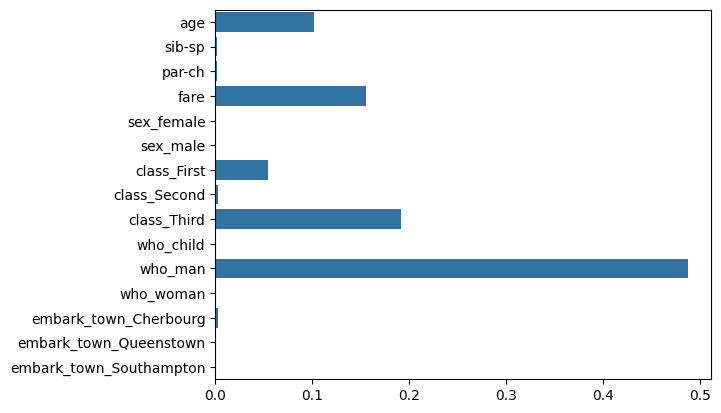

In [ ]:
sb.barplot(y=model2.feature_names_in_,x=model2.feature_importances_)
plt.show()